## PROJECT  OBJECTIVE: We  will  build  a  recommendation  system  using  popularity  based  and  collaborative filtering methods to recommend mobile phones to a user which are most popular and personalised respectively

### 1.Import the necessary libraries and read the provided CSVs as a data frame and perform the below steps. [15 Marks]

#### A.Merge all the provided CSVs into one dataFrame. [2 Marks]

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes = True)  #sets nice background color


In [2]:
p1 = pd.read_csv('phone_user_review_file_1.csv')

In [3]:
p1.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10.0,10.0,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
2,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6.0,10.0,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9.2,10.0,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,/cellphones/samsung-galaxy-s8/,5/11/2017,en,us,Verizon Wireless,verizonwireless.com,4.0,10.0,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8


In [4]:
p1.shape

# p1 = This df has 11 columns and 374910 rows

(374910, 11)

In [5]:
p2 = pd.read_csv('phone_user_review_file_2.csv')

In [6]:
p2.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/leagoo-lead-7/,4/15/2015,en,us,Amazon,amazon.com,2.0,10.0,"The telephone headset is of poor quality , not...",luis,Leagoo Lead7 5.0 Inch HD JDI LTPS Screen 3G Sm...
1,/cellphones/leagoo-lead-7/,5/23/2015,en,gb,Amazon,amazon.co.uk,10.0,10.0,This is my first smartphone so I have nothing ...,Mark Lavin,Leagoo Lead 7 Lead7 MTK6582 Quad core 1GB RAM ...
2,/cellphones/leagoo-lead-7/,4/27/2015,en,gb,Amazon,amazon.co.uk,8.0,10.0,Great phone. Battery life not great but seems ...,tracey,Leagoo Lead 7 Lead7 MTK6582 Quad core 1GB RAM ...
3,/cellphones/leagoo-lead-7/,4/22/2015,en,gb,Amazon,amazon.co.uk,10.0,10.0,Best 90 quid I've ever spent on a smart phone,Reuben Ingram,Leagoo Lead 7 Lead7 MTK6582 Quad core 1GB RAM ...
4,/cellphones/leagoo-lead-7/,4/18/2015,en,gb,Amazon,amazon.co.uk,10.0,10.0,I m happy with this phone.it s very good.thx team,viorel,Leagoo Lead 7 Lead7 MTK6582 Quad core 1GB RAM ...


In [7]:
p2.shape

# p2 = This df has 11 columns and 114925 rows

(114925, 11)

In [8]:
p3 = pd.read_csv('phone_user_review_file_3.csv')

In [9]:
p3.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,11/7/2015,pt,br,Submarino,submarino.com.br,6.0,10.0,"recomendo, eu comprei um, a um ano, e agora co...",herlington tesch,Samsung Smartphone Samsung Galaxy S3 Slim G381...
1,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,10/2/2015,pt,br,Submarino,submarino.com.br,10.0,10.0,Comprei um pouco desconfiada do site e do celu...,Luisa Silva Marieta,Samsung Smartphone Samsung Galaxy S3 Slim G381...
2,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,9/2/2015,pt,br,Submarino,submarino.com.br,10.0,10.0,"Muito bom o produto, obvio que tem versões mel...",Cyrus,Samsung Smartphone Samsung Galaxy S3 Slim G381...
3,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,9/2/2015,pt,br,Submarino,submarino.com.br,8.0,10.0,Unica ressalva fica para a camera que poderia ...,Marcela Santa Clara Brito,Samsung Smartphone Samsung Galaxy S3 Slim G381...
4,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,9/1/2015,pt,br,Colombo,colombo.com.br,8.0,10.0,Rapidez e atenção na entrega. O aparelho é mui...,Claudine Maria Kuhn Walendorff,"Smartphone Samsung Galaxy S3 Slim, Dual Chip, ..."


In [10]:
p3.shape

# p3 = This df has 11 columns and 312961 rows

(312961, 11)

In [11]:
p4 = pd.read_csv('phone_user_review_file_4.csv')

In [12]:
p4.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-s7262-duos-galaxy-ace/,3/11/2015,en,us,Amazon,amazon.com,2.0,10.0,was not conpatable with my phone as stated. I ...,Frances DeSimone,Samsung Galaxy Star Pro DUOS S7262 Unlocked Ce...
1,/cellphones/samsung-s7262-duos-galaxy-ace/,17/11/2015,en,in,Zopper,zopper.com,10.0,10.0,Decent Functions and Easy to Operate Pros:- Th...,Expert Review,Samsung Galaxy Star Pro S7262 Black
2,/cellphones/samsung-s7262-duos-galaxy-ace/,29/10/2015,en,in,Amazon,amazon.in,4.0,10.0,Not Good Phone such price. Hang too much and v...,Amazon Customer,Samsung Galaxy Star Pro GT-S7262 (Midnight Black)
3,/cellphones/samsung-s7262-duos-galaxy-ace/,29/10/2015,en,in,Amazon,amazon.in,6.0,10.0,not bad for features,Amazon Customer,Samsung Galaxy Star Pro GT-S7262 (Midnight Black)
4,/cellphones/samsung-s7262-duos-galaxy-ace/,29/10/2015,en,in,Amazon,amazon.in,10.0,10.0,Excellent product,NHK,Samsung Galaxy Star Pro GT-S7262 (Midnight Black)


In [13]:
p4.shape

# p4 = This df has 11 columns and 98284 rows

(98284, 11)

In [14]:
p5 = pd.read_csv('phone_user_review_file_5.csv')

In [15]:
p5.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/karbonn-k1616/,7/13/2016,en,in,91 Mobiles,91mobiles.com,2.0,10.0,I bought 1 month before. currently speaker is ...,venkatesh,Karbonn K1616
1,/cellphones/karbonn-k1616/,7/13/2016,en,in,91 Mobiles,91mobiles.com,6.0,10.0,"I just bought one week back, I have Airtel con...",Venkat,Karbonn K1616
2,/cellphones/karbonn-k1616/,7/13/2016,en,in,91 Mobiles,91mobiles.com,4.0,10.0,one problem in this handset opera is not worki...,krrish,Karbonn K1616
3,/cellphones/karbonn-k1616/,4/25/2014,en,in,Naaptol,naaptol.com,10.0,10.0,here Karbonn comes up with an another excellen...,BRIJESH CHAUHAN,Karbonn K1616 - Black
4,/cellphones/karbonn-k1616/,4/23/2013,en,in,Naaptol,naaptol.com,10.0,10.0,"What a phone, all so on Naaptol my god 23% off...",Suraj CHAUHAN,Karbonn K1616 - Black


In [16]:
p5.shape

# p5 = This df has 11 columns and 350216 rows

(350216, 11)

In [17]:
p6 = pd.read_csv('phone_user_review_file_6.csv')

In [18]:
p6.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-instinct-sph-m800/,9/16/2011,en,us,Phone Arena,phonearena.com,8.0,10.0,I've had the phone for awhile and it's a prett...,ajabrams95,Samsung Instinct HD
1,/cellphones/samsung-instinct-sph-m800/,2/13/2014,en,us,Amazon,amazon.com,6.0,10.0,to be clear it is not the sellers fault that t...,Stephanie,Samsung SPH M800 Instinct
2,/cellphones/samsung-instinct-sph-m800/,12/30/2011,en,us,Phone Scoop,phonescoop.com,9.0,10.0,Well i love this phone. i have had ton of phon...,snickers,Instinct M800
3,/cellphones/samsung-instinct-sph-m800/,10/18/2008,en,us,HandCellPhone,handcellphone.com,4.0,10.0,I have had my Instinct for several months now ...,A4C,Samsung Instinct
4,/cellphones/samsung-instinct-sph-m800/,9/6/2008,en,us,Reviewed.com,reviewed.com,6.0,10.0,i have had this instinct phone for about two m...,betaBgood,Samsung Instinct


In [19]:
p6.shape

# p6 = This df has 11 columns and 163837 rows

(163837, 11)

In [20]:
df_list = [p1, p2, p3, p4, p5, p6]
data = pd.concat(df_list)

#Concatenating the dataframes since all the columns are same for the 6 dataframes given

In [21]:
data.shape

# data = This df has 11 columns and 1415133 rows after contatenation

(1415133, 11)

In [22]:
data.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10.0,10.0,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
2,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6.0,10.0,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9.2,10.0,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,/cellphones/samsung-galaxy-s8/,5/11/2017,en,us,Verizon Wireless,verizonwireless.com,4.0,10.0,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8


#### B.Explore, understand the Data and share at least 2 observations. [2 Marks]

In [23]:
data['lang'].value_counts()

# Observation : Most common language in which reviews are given is English

en    554746
ru    207443
de    176600
it    116120
es     99739
fr     95080
pt     67155
nl     38375
tr     28359
sv     17149
fi      6953
cs      2533
no      1918
he      1370
pl       493
da       418
hu       346
id       271
ja        33
zh        19
ar        12
ko         1
Name: lang, dtype: int64

In [24]:
data['country'].value_counts()

# Observation : Most reviews were given from the US

us    318435
de    176525
ru    174945
in    127876
it    116120
gb     95795
fr     95080
es     76271
br     63975
ua     32498
tr     28359
nl     25716
se     17149
ar     15636
be     12659
ca     11118
fi      6953
pt      3180
mx      3142
cz      2533
no      1918
ec      1478
au      1413
il      1370
co      1350
uy       725
cl       603
pl       493
dk       418
ve       389
hu       346
id       271
pe       145
ch        75
nz        74
jp        33
za        25
tw        14
ae        12
sg        10
cn         5
kr         1
Name: country, dtype: int64

In [25]:
data['source'].value_counts()

# Observation : Most common platform is amazon, which shows the boom of online retail

Amazon                    728471
Yandex                    123066
Ciao                       59425
Samsung                    45585
MercadoLibre               33531
                           ...  
???????????????�??????         1
Vodafone                       1
RECENZJE.NET.PL                1
TechnikDirekt                  1
OO.com.au                      1
Name: source, Length: 331, dtype: int64

#### C.Round off scores to the nearest integers. [3 Marks]

In [26]:
decimals = 0    
data['score'] = data['score'].apply(lambda x: round(x, decimals))

#Taking decimals as zero so as to round off the decimals to nearest integer

In [27]:
data['score']

#All values are rounded off

0         10.0
1         10.0
2          6.0
3          9.0
4          4.0
          ... 
163832     2.0
163833    10.0
163834     2.0
163835     8.0
163836     2.0
Name: score, Length: 1415133, dtype: float64

#### D.Check for missing values. Impute the missing values, if any. [2 Marks]

In [28]:
data.isnull().values.any()

#Checking if there are any null values

True

In [29]:
data.isnull().sum()

#There are empty values in various columns

phone_url        0
date             0
lang             0
country          0
source           0
domain           0
score        63489
score_max    63489
extract      19361
author       63202
product          1
dtype: int64

In [30]:
data["score"] = data["score"].fillna(data["score"].median())
data["score_max"] = data["score_max"].fillna(data["score_max"].median())

#Filling the score values with corresponding median values

In [31]:
data.isnull().sum()

#Checking if the values are replaced

phone_url        0
date             0
lang             0
country          0
source           0
domain           0
score            0
score_max        0
extract      19361
author       63202
product          1
dtype: int64

In [32]:
data["author"] = data["author"].fillna(data["author"].mode()[0])
data["extract"] = data['extract'].fillna(data['extract'].mode()[0])
data["product"] = data['product'].fillna(data['product'].mode()[0])

#Filling the discrete varibales with the mode values

In [33]:
data.isnull().sum()

#Checking if the null values are all replaced

phone_url    0
date         0
lang         0
country      0
source       0
domain       0
score        0
score_max    0
extract      0
author       0
product      0
dtype: int64

#### E.Check for duplicate values and remove them, if any. [2 Marks]

In [34]:
#Checking for duplicated values in the combined dataframe

data.duplicated(subset=['phone_url', 'date', 'lang', 'country', 'source', 'domain', 'score', 'score_max', 'extract', 'product']).sum()

10904

In [35]:
# Droppping the duplicated values

data = data.drop_duplicates(subset=['phone_url', 'date', 'lang', 'country', 'source', 'domain', 'score', 'score_max', 'extract', 'product'])

In [36]:
#Shape of the dataframe after dropping duplicated values

data.shape

(1404229, 11)

#### F.Keep only 1 Million data samples. Use random state=612. [2 Marks]

In [37]:
df = data.sample(100000, random_state=612)

#Keeping only 1M data samples using random state 612

In [38]:
df.shape

#Checking the shape of the changes dataset = df

(100000, 11)

#### G.Drop irrelevant features. Keep features like Author, Product, and Score. [2 Marks]

In [39]:
df.columns

Index(['phone_url', 'date', 'lang', 'country', 'source', 'domain', 'score',
       'score_max', 'extract', 'author', 'product'],
      dtype='object')

In [40]:
df= df.drop(labels=['date', 'phone_url','domain','extract'], axis=1)

#These columns don't add value to teh recommendation system as such. For example phone url isn't absoulutely necessary since product already describes the phone details 

In [41]:
df.columns

# Dataframe after dropping the unwanted columns

Index(['lang', 'country', 'source', 'score', 'score_max', 'author', 'product'], dtype='object')

### 2.Answer the following questions. [10 Marks]

#### A.Identify the most rated products. [3 Marks]

In [42]:
pd.DataFrame( df.groupby("product")["score"].mean().nlargest(10))

#Top 10 products with the highest scores

,score
product,
**** COFFRET 5 ACCESSOIRES LUMIA 510 **** Etui lumia 510 housse NOKIA LUMIA 51 coque NOKIA Lumia 510 avec rabat...,10.0
***** A&D ***** ETUI LG T 385 coque LG T385 Wifi Housse LG T385b protection pochette cuir PU LG T385 WI-fi blanc...,10.0
1st Film de protection d'écran en Verre trempé pour Samsung Galaxy A3 Transparent,10.0
2014 Newest DOOGEE DAGGER DG550 5.5'' Unlocked Octa Core 1.7Ghz Android 4.2.9 OS 3G Smartphone -- 5-Point-Touch...,10.0
2015 Newest iNEW V1 5'' IPS Android 4.4 Kitkat OS Unlocked 3G Phablet -- MTK6582 Quad Core 1.3GHz Dual SIM Card...,10.0
"2020 Moto Z Play Bianco-Cellulare Da 5,5 "", 3 GB Di RAM, 32 GB, Fotocamera 5 MP, Android 6.0.1): Bianco",10.0
2610,10.0
"32GB Unlocked Xiaomi M2S MI2S Quad Core APQ8064PRO 4.3"" 720p 13MP 2G Ram Phone",10.0
3555,10.0


#### B.Identify the users with most number of reviews. [3 Marks]

In [43]:
pd.DataFrame( df.groupby("author")['score'].count().sort_values(ascending=False).nlargest(10))

#Top 10 users with maximum reviews given for products

,score
author,
Amazon Customer,9742
Cliente Amazon,1421
e-bit,581
Client d'Amazon,577
Amazon Kunde,318
Anonymous,192
einer Kundin,189
einem Kunden,134
unknown,103


#### C.Select the data with products having more than 50 ratings and users who have given more than 50 ratings. Report the shape of the final dataset. [4 Marks]

In [44]:
score_count = pd.DataFrame(df.groupby('product')['score'].mean())
score_count.head()

,score
product,
"(DG300 Versione Aggiornata)5'' DOOGEE VOYAGER2 DG310 Dual Flashlights IPS Screen 3G Smartphone Android 4.4 MTK6582 1.3GHz Quad Core Telefono Cellulare Dual SIM 8G ROM OTG OTA GPS WIFI, BIANCO",7.000000
**** COFFRET 5 ACCESSOIRES LUMIA 510 **** Etui lumia 510 housse NOKIA LUMIA 51 coque NOKIA Lumia 510 avec rabat...,10.000000
**** PacK Exclusif A&d COFFRET WIKO **** Housse WIKO CINK FIVE Coque wiko cink five protection flip cover wiko...,6.666667
***** A&D ***** ETUI LG T 385 coque LG T385 Wifi Housse LG T385b protection pochette cuir PU LG T385 WI-fi blanc...,10.000000
03 Apple MD300DN/A iPhone 5 32 GB Wei?? (GSM),9.000000


In [45]:
score_count['scores_counts'] = pd.DataFrame(df.groupby('product')['score'].count().sort_values(ascending=False))
score_count

,score,scores_counts
product,,
"(DG300 Versione Aggiornata)5'' DOOGEE VOYAGER2 DG310 Dual Flashlights IPS Screen 3G Smartphone Android 4.4 MTK6582 1.3GHz Quad Core Telefono Cellulare Dual SIM 8G ROM OTG OTA GPS WIFI, BIANCO",7.000000,2
**** COFFRET 5 ACCESSOIRES LUMIA 510 **** Etui lumia 510 housse NOKIA LUMIA 51 coque NOKIA Lumia 510 avec rabat...,10.000000,1
**** PacK Exclusif A&d COFFRET WIKO **** Housse WIKO CINK FIVE Coque wiko cink five protection flip cover wiko...,6.666667,3
***** A&D ***** ETUI LG T 385 coque LG T385 Wifi Housse LG T385b protection pochette cuir PU LG T385 WI-fi blanc...,10.000000,1
03 Apple MD300DN/A iPhone 5 32 GB Wei?? (GSM),9.000000,2
...,...,...
טלפון סלולרי Xiaomi Redmi Note 4 64GB,8.800000,5
טלפון סלולרי iPhone 5s 16GB SimFree מהיצרן Apple,10.000000,1
סמארטפון LG G5 H850,10.000000,1


In [46]:
final_scores_50 = score_count[score_count['scores_counts'] >= 50]
final_scores_50

,score,scores_counts
product,,
"Alcatel One Touch 20-04G Telefono Cellulare, Nero",8.627451,51
"Alcatel OneTouch Idol 3 Global Unlocked 4G LTE Smartphone, 5.5 HD IPS Display, 16GB (GSM - US Warranty)",8.535714,56
Apple iPhone,7.600000,50
"Apple iPhone 5 Unlocked Cellphone, 32GB, Black",6.280000,50
"Apple iPhone 5s (Gold, 16GB)",8.792453,53
...,...,...
Smartphone Samsung Galaxy Gran Prime TV SM-G530,9.215686,51
Sony Ericsson Xperia X10,8.232143,56
Sprint LG Volt White (Sprint Prepaid),8.000000,52


In [47]:
final_scores_50.shape

(125, 2)

In [48]:
user_count = pd.DataFrame(df.groupby('author')['score'].mean())
user_count.head()

,score
author,
!sChÄdEl!,5.0
"""EL MORO""",6.0
"""Mystic-Chris""",10.0
"""badtothebonz""",8.0
"""brandonfraser02""",6.0


In [49]:
user_count['user_ratings'] = pd.DataFrame(df.groupby('author')['score'].count().sort_values(ascending=False))
user_count

,score,user_ratings
author,,
!sChÄdEl!,5.0,1
"""EL MORO""",6.0,1
"""Mystic-Chris""",10.0,1
"""badtothebonz""",8.0,1
"""brandonfraser02""",6.0,1
...,...,...
⚜️MYSTERY⚜️,10.0,1
✿ܓНหԿьศ †,10.0,1
❼region,10.0,1


In [50]:
final_userscores_50 = user_count[user_count['user_ratings'] >= 50]
final_userscores_50

,score,user_ratings
author,,
Alex,8.718310,71
Amazon Customer,7.436050,9742
Amazon Kunde,7.220126,318
Andrea,8.316667,60
Anonymous,7.765625,192
Anonymous,9.365591,93
Chris,8.689655,58
Client d'Amazon,7.161179,577
Cliente Amazon,7.909923,1421


In [51]:
final_userscores_50.shape

(23, 2)

In [52]:
newdf = final_userscores_50.append(final_scores_50)

In [53]:
newdf

,score,user_ratings,scores_counts
Alex,8.718310,71.0,NaN
Amazon Customer,7.436050,9742.0,NaN
Amazon Kunde,7.220126,318.0,NaN
Andrea,8.316667,60.0,NaN
Anonymous,7.765625,192.0,NaN
...,...,...,...
Smartphone Samsung Galaxy Gran Prime TV SM-G530,9.215686,NaN,51.0
Sony Ericsson Xperia X10,8.232143,NaN,56.0
Sprint LG Volt White (Sprint Prepaid),8.000000,NaN,52.0
Tracfone Motorola Moto E Android Prepaid Phone with Triple Minutes (Tracfone),7.800000,NaN,50.0


#### 3.Build a popularity based model and recommend top 5 mobile phones. [5 Marks]

In [54]:
data.columns

Index(['phone_url', 'date', 'lang', 'country', 'source', 'domain', 'score',
       'score_max', 'extract', 'author', 'product'],
      dtype='object')

In [55]:
no_of_ratings_per_product = data.groupby(by='product')['score'].count().sort_values(ascending=False)

#Fetching teh mumber of ratings for a product

In [56]:
no_of_ratings_per_product

product
Lenovo Vibe K4 Note (White,16GB)                                                                                     5219
Lenovo Vibe K4 Note (Black, 16GB)                                                                                    4387
OnePlus 3 (Graphite, 64 GB)                                                                                          4101
OnePlus 3 (Soft Gold, 64 GB)                                                                                         3550
Huawei P8lite zwart / 16 GB                                                                                          2705
                                                                                                                     ... 
Nokia Lumia 1020 RM-877 32GB 4G LTE Black AT&T Branded Unlocked GSM Phone w/ 41MP Camera 4.5" 2GB RAM                   1
Nokia Lumia 1020 Frozen Dreams Skin                                                                                     1
Nokia Lumia 1020

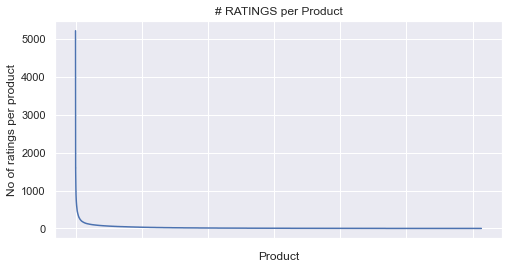

In [57]:
fig = plt.figure(figsize=plt.figaspect(.5))
ax = plt.gca()
plt.plot(no_of_ratings_per_product.values)
plt.title('# RATINGS per Product')
plt.xlabel('Product')
plt.ylabel('No of ratings per product')
ax.set_xticklabels([])

plt.show()

# Plotting graph for ratings per product

In [58]:
#Average rating of the product 

data.groupby('product')['score'].mean().sort_values(ascending=False).head()

product
Samsung Galaxy S II i9100 Zwart                                                                                        10.0
Doro PhoneEasy 612 (Unlocked)                                                                                          10.0
Samsung Galaxy J1 Wit                                                                                                  10.0
Samsung Galaxy J1 Smartphone débloqué 4G (Ecran: 4,5 Pouces - 8 Go - Simple Micro-SIM - Android 5.1 Lollipop) Blanc    10.0
Samsung Galaxy J1 SM-J120H/DS Dourado Dual Chip Android 5.1 Lollipop 3G Wi-fi Processador Quad Core 1.2 Ghz            10.0
Name: score, dtype: float64

In [59]:
#Total no of rating for product

data.groupby('product')['score'].count().sort_values(ascending=False).head()

product
Lenovo Vibe K4 Note (White,16GB)     5219
Lenovo Vibe K4 Note (Black, 16GB)    4387
OnePlus 3 (Graphite, 64 GB)          4101
OnePlus 3 (Soft Gold, 64 GB)         3550
Huawei P8lite zwart / 16 GB          2705
Name: score, dtype: int64

In [60]:
ratings_mean_count = pd.DataFrame(data.groupby('product')['score'].mean())

In [61]:
ratings_mean_count['rating_counts'] = pd.DataFrame(data.groupby('product')['score'].count())

In [62]:
ratings_mean_count.head()

#dataframe with score and rating counts for corresponding product

,score,rating_counts
product,,
"'Smartphone Meizu Pro 5, 5,7 pouces avec Exynos 7420 Octa 8 Core Processeur. mémoire RAM 4 Go et 64 Go mémoire...",8.0,1
"'Sony Xperia X (F5122) – White – Dual Sim (Google Android 6.0.1, 5 Display, 2 x CORTEX A72 1.8 GHz + 4 x cortex-a53...",10.0,1
"'Sony Xperia X (F5122) – rosa – Dual Sim (Google Android 6.0.1, 5 Display, 2 x CORTEX A72 1.8 GHz + 4 x cortex-a53...",10.0,1
"(7.62 cm (3 )Afficheur/écran, 2 MPixCaméra;blanc)-Smartphone",6.0,1
"(CUBOT) GT88 5.5"" qHD 1.3GHz MTK6572 2-Core Android 4.2.2 3G Phone 8MP CAM 512MB RAM 4GB ROM",8.0,1


In [63]:
ratings_mean_count['rating_counts'].max()

#Max ratings given for a product

5219

Text(0.5, 1.0, 'No. of ratings per product')

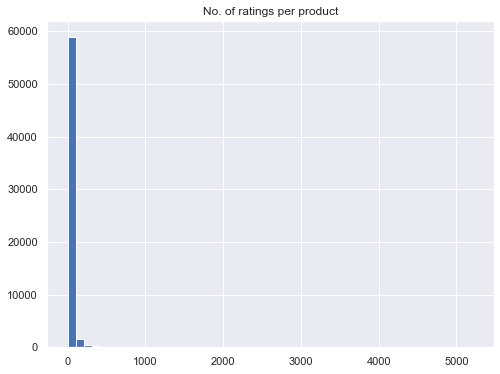

In [64]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['rating_counts'].hist(bins=50)
plt.title('No. of ratings per product')


Text(0.5, 1.0, 'Average scores per product')

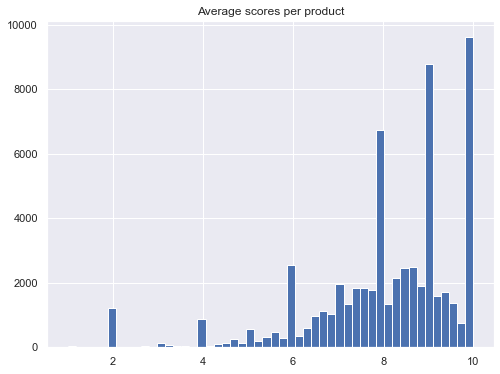

In [65]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['score'].hist(bins=50)
plt.title('Average scores per product')


<Figure size 576x432 with 0 Axes>

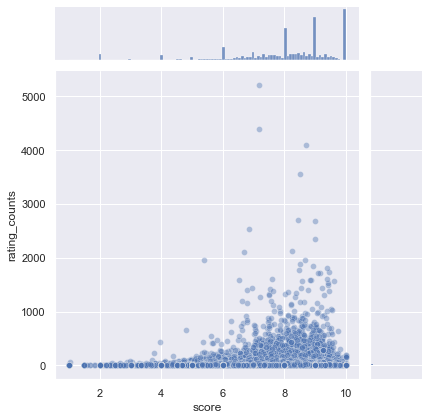

In [66]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(x='score', y='rating_counts', data=ratings_mean_count, alpha=0.4)

#Checking joint plot of score and ratings per product to check for relations

<AxesSubplot:xlabel='product'>

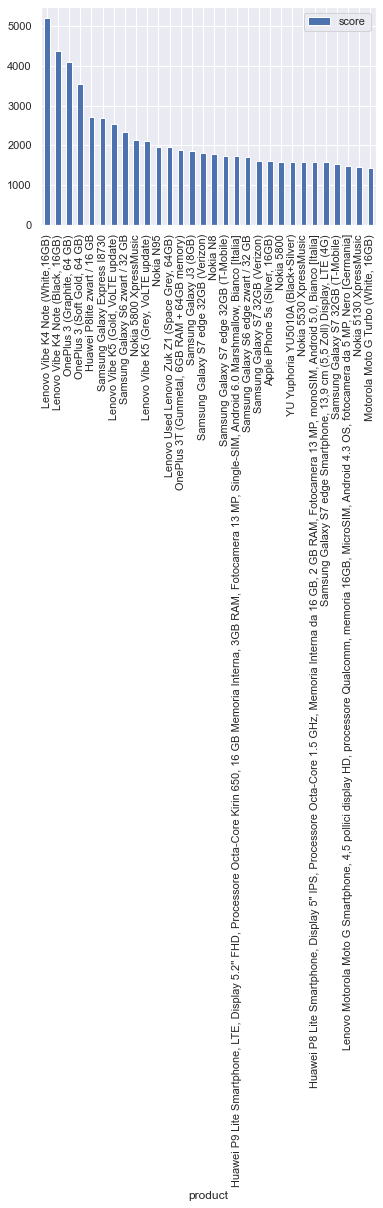

In [67]:
popular_products = pd.DataFrame(data.groupby('product')['score'].count())
most_popular = popular_products.sort_values('score', ascending=False)
most_popular.head(30).plot(kind = "bar")

#Grouping in order of popular products

### Lenovo Vibe K4 Note (White,16GB) is the most popular product

#### 4.Build a collaborative filtering model using SVD. You can use SVD from surprise or build it from scratch(Note: Incase you’re building it from scratch you can limit your data points to 5000 samples if you face memory issues). Build a collaborative filtering model using kNNWithMeans from surprise. You can try both user-based and item-based model. [10 Marks]

In [68]:
from surprise import Dataset,Reader
from surprise.model_selection import cross_validate
from surprise import NormalPredictor


reader = Reader(rating_scale=(1, 10))

In [69]:
df_data = data.iloc[:5000]

In [70]:
df_data.shape

(5000, 11)

In [71]:
counts = pd.value_counts(df_data['author'])


In [72]:
dataset = Dataset.load_from_df(df_data[['author', 'product', 'score']], reader)


In [73]:
dataset.df

,author,product,score
0,CarolAnn35,Samsung Galaxy S8,10.0
1,james0923,Samsung Galaxy S8,10.0
2,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl...",6.0
3,Buster2020,Samsung Galaxy S8 64GB (AT&T),9.0
4,S Ate Mine,Samsung Galaxy S8,4.0
...,...,...,...
5008,Rocchigiano,"Samsung Galaxy S6 edge+ Smartphone 64 GB, Nero...",10.0
5009,Cliente Amazon,"Samsung Galaxy S6 edge+ Smartphone 64 GB, Nero...",10.0
5010,Nazar Syzov,"Samsung Galaxy S6 edge+ Smartphone 64 GB, Nero...",10.0
5011,Dimitri/Meyer 2510,Samsung Galaxy S6 Edge Plus Smartphone débloqu...,10.0


In [74]:
# Split data to train and test
from surprise.model_selection import train_test_split
trainset, testset = train_test_split(dataset, test_size=.25,random_state=123)

In [75]:
trainset.all_ratings()

<generator object Trainset.all_ratings at 0x00000232E309E580>

In [76]:
from surprise import SVD, KNNWithMeans
from surprise import accuracy

In [77]:
svd_model = SVD(n_factors=5,biased=False)
svd_model.fit(trainset)

In [78]:
testset[0]

('trey3161975 ', 'Samsung Galaxy S6 edge+ 64GB (AT&T)', 10.0)

In [79]:
test_pred = svd_model.test(testset)

#### 5.Evaluate the collaborative model. Print RMSE value. [2 Marks]

In [80]:
# compute RMSE
accuracy.rmse(test_pred)

RMSE: 2.1172


2.117210166664603

In [81]:
#Item based collaborative filtering

algo_i = KNNWithMeans(k=10, sim_options={ 'user_based': False})

algo_i.fit(trainset)

Computing the msd similarity matrix...
Done computing similarity matrix.


In [82]:
# perf = cross_validate(algo_i, dataset, measures=['RMSE', 'MAE'], cv=3)
# print_perf(perf)

In [83]:
test_pred=algo_i.test(testset)
print(accuracy.rmse(test_pred))

RMSE: 1.7192
1.71923528123674


In [84]:
algo = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': True})
algo.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [85]:
# run the trained model against the testset
test_pred = algo.test(testset)

In [86]:
test_pred

[Prediction(uid='trey3161975 ', iid='Samsung Galaxy S6 edge+ 64GB (AT&T)', r_ui=10.0, est=9.180266666666666, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='Chenyu Liu', iid='Samsung Galaxy S6 Edge Plus SM-G928c 32GB Factory Unlocked White', r_ui=10.0, est=9.180266666666666, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='GravelEvolution ', iid='Samsung Galaxy S6 edge+ 32GB (T-Mobile)', r_ui=10.0, est=9.180266666666666, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='bigdawg99 ', iid='Samsung Galaxy S6 edge+ 32GB (T-Mobile)', r_ui=10.0, est=9.180266666666666, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='Павел К', iid='Samsung Galaxy S8 (желтый топаз)', r_ui=9.0, est=9.0, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='Matias Shaw', iid='Samsung Galaxy S6 Edge Plus G928C 32GB Unlocke

In [87]:
print("User-based Model : Test Set")
accuracy.rmse(test_pred, verbose=True)

User-based Model : Test Set
RMSE: 1.7208


1.7207743807144247

#### 6. Predict score (average rating) for test users. [2 Marks]

In [88]:
uid ='Scots79'  # raw user id
iid = 'Samsung Galaxy S6 edge+ 32GB (Verizon)'  # raw item id

In [89]:
# get a prediction for specific users and items.
pred = algo.predict(uid, iid, verbose=True)
print('Predicted score for a particular user and product : ',pred.est)

user: Scots79    item: Samsung Galaxy S6 edge+ 32GB (Verizon) r_ui = None   est = 9.18   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
Predicted score for a particular user and product :  9.180266666666666


#### 7.Report your findings and inferences. [2 Marks]

#### Model predicts average rating wherever estimation is not possible

#### Model-based Collaborative Filtering is a personalised recommender system, the recommendations are based on the past behavior of the user and it is not dependent on any additional information.

#### The Popularity-based recommender system is non-personalised and the recommendations are based on frequecy counts, which may be not suitable to the user.

#### 8.Try and recommend top 5 products for test users. [5 Marks]

#### Top 10 recommendtaions by amazon user:

In [90]:
pred_10 = pd.DataFrame(test_pred)
pred_10[pred_10['uid'] == 'Amazon Customer'][['iid', 'r_ui','est']].sort_values(by = 'r_ui',ascending = False).head(10)

,iid,r_ui,est
24,"Samsung Galaxy S6 Edge+, Black 32GB (Verizon W...",10.0,8.665551
427,Samsung Galaxy S6 Edge Plus SM-G928 64GB Gold ...,10.0,9.180267
1050,"Samsung Galaxy S6 Edge+, Black 32GB (Verizon W...",10.0,8.665551
1038,"Samsung G928A Unlocked Galaxy S6 Edge+, 32GB, ...",10.0,6.525502
1016,Samsung Galaxy S6 Edge+ G928G 32GB Unlocked Ph...,10.0,10.000000
995,"Samsung G928A Unlocked Galaxy S6 Edge+, 32GB, ...",10.0,6.525502
977,Samsung Galaxy S6 Edge Plus SM-G928 64GB Cell ...,10.0,9.968407
928,Samsung Galaxy S6 Edge Plus SM-G928c 32GB Fact...,10.0,7.845906
830,Samsung S6 Edge Plus G928V 32GB Verizon 4G LTE...,10.0,6.047991
814,Samsung S6 Edge Plus 32GB Black UK Sim-Free Sm...,10.0,8.444247


#### 9.Try other techniques (Example: cross validation) to get better results. [3 Marks]

In [91]:
df_data

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10.0,10.0,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
2,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6.0,10.0,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9.0,10.0,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,/cellphones/samsung-galaxy-s8/,5/11/2017,en,us,Verizon Wireless,verizonwireless.com,4.0,10.0,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8
...,...,...,...,...,...,...,...,...,...,...,...
5008,/cellphones/samsung-galaxy-s6-edgeplus/,10/16/2015,it,it,Amazon,amazon.it,10.0,10.0,Non vorrei dire niente ma per adesso super-cel...,Rocchigiano,"Samsung Galaxy S6 edge+ Smartphone 64 GB, Nero..."
5009,/cellphones/samsung-galaxy-s6-edgeplus/,10/16/2015,it,it,Amazon,amazon.it,10.0,10.0,Come da titolo. L'ho preso per il mio capo che...,Cliente Amazon,"Samsung Galaxy S6 edge+ Smartphone 64 GB, Nero..."
5010,/cellphones/samsung-galaxy-s6-edgeplus/,10/16/2015,it,it,Amazon,amazon.it,10.0,10.0,Che dire il prodotto e eccellente questo Smart...,Nazar Syzov,"Samsung Galaxy S6 edge+ Smartphone 64 GB, Nero..."
5011,/cellphones/samsung-galaxy-s6-edgeplus/,10/16/2015,fr,fr,Amazon,amazon.fr,10.0,10.0,Je pense que Même en 2017 (je l'ai acheter à c...,Dimitri/Meyer 2510,Samsung Galaxy S6 Edge Plus Smartphone débloqu...


In [92]:
from surprise.model_selection import GridSearchCV

param_grid = {'n_factors': [50,100,150],'n_epochs': [20,30], 'lr_all': [0.005,0.01],'reg_all':[0.02,0.1]}
gs = GridSearchCV(SVD, param_grid, measures=["rmse", "mae"], cv=3)

gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3)
gs.fit(dataset)

print(gs.best_score["rmse"])
print(gs.best_params["rmse"])

1.617697110561446
{'n_factors': 50, 'n_epochs': 20, 'lr_all': 0.005, 'reg_all': 0.1}


#### 10.In what business scenario you should use popularity based Recommendation Systems ? [2 Marks]

#### Businesses like Netflix also use popularity based recommendation system. They have a column which depicts 'TOP 10 IN INDIA' which indicates the movies or TV series which most of teh users are watching. Likewise it can also eb used in websites like YouTube : trending videos, Google : popular news etc. Business models where, they want to keep teh customer engaged even when tehy don't have lot of data about the users liking can use popularity based recommendation systems.

#### 11.In what business scenario you should use CF based Recommendation Systems ? [2 Marks]

#### Many companies use CF systems to simply encourage engagement and activity on their product or platform like targetted advertising. YouTube uses this to target audience with correct ads. Either as a part of their videos or seperately. So, basiclaly this can be used by companies who have nough user data so they can compare the liking of customers and sugegst vidoes or do targeted advertising

#### 12.What other possible methods can you think of which can further improve the recommendation for different users ? [2 Marks]

#### Using hybrid models is the most common and effective way to improve and optimise recommendation systems, like feature augmentation or cascading. This is also based on user information and non availability of teh same. Liek one can switch between systems based on availability of data. Or it can also be a mixed scenario where many recommendattion systems are used to give better results.